# Knowledge Data Discovery and Neural Networks : Final Project

In this notebook we will prepare data and run several algorithms for classification

# 1. Imports

In [1]:
# add more packages in this section
import metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. data preperation

In [2]:
data = pd.read_csv("data/adult.data", header = None)
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols

## 2.1 Categorical feature handling
* Name two machine learning algorithms that can deal with categorical features without special handling?

special handling = one hot encoding etc..

#### YOUR VERBAL SOLUTION HERE
2 ML algorithms which can handle categorical features without special handling (e.g. One-Hot encoding) can be: <br/>
Decision tree <br/>
Naive Bayes <br/>

BTW, it also depends if the categorical features in the model are having some sensible order (e.g. S, M, L, XL) or not (e.g. Male, Female),<br/>
but as a rule of thumb, the classification algorithms above (among other ones) can deal very good with categorical features without any handling.
#### END YOUR VERBAL SOLUTION HERE

## 2.2 One hot encoding 

* Remove the y column from the data variable and save it to the variable y
* Transform the categorical columns to one hot encoding

You may find get_dummies function in pandas useful

In [3]:
### YOUR CODE HERE

y = data['y']
X = data.loc[:, data.columns != 'y']

categorical_cols = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
X = pd.get_dummies(X, columns=categorical_cols)
print("X: ", X.shape)
print ("y: ", y.shape)

### END YOUR CODE

X:  (32561, 108)
y:  (32561,)


## 2.3 Train test split

* Convert the y column - replace <=50K with 0 and >50K with 1 
* Split the dataset into train and test set (use 15% for the test set)

at the end, make sure you have the following variables:

* X
* y
* X_train
* X_test
* y_train
* y_test

You may find sklearn train_test_split useful

In [4]:
### YOUR CODE HERE

#Part1
y.sample(20)

6963      <=50K
22949     <=50K
10444      >50K
9502       >50K
29677     <=50K
12308     <=50K
28147     <=50K
320       <=50K
31153     <=50K
11123     <=50K
22573      >50K
19252      >50K
12537     <=50K
11421     <=50K
9474      <=50K
26185     <=50K
29361     <=50K
16286     <=50K
32305      >50K
23585      >50K
Name: y, dtype: object

In [4]:
y = y.replace({' <=50K': 0, ' >50K': 1})

#another way to achieve it, is before I remove the 'y' from the data, using pandas.codes
#data['y'] = pd.Categorical(data['y']).codes

In [5]:
#Part2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.85,test_size=0.15, random_state=101)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

### END YOUR CODE

X_train:  (27676, 108)
y_train:  (27676,)
X_test:  (4885, 108)
y_test:  (4885,)


## 2.4 Numeric feature normalization

* Scale the numeric features to to have zero mean (z score normalization)

- Don't scale the boolean features

You may find sklearn StandardScaler useful

In [6]:
### YOUR CODE HERE

from sklearn.preprocessing import * 
numeric_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
X.loc[:,numeric_cols] = scale(X[numeric_cols])

### END YOUR CODE

# 3 Models

Create a function `cv(x, y, model)` (cv stands for cross validation) that gets a model (sklearn classifier) and the data.  
The function should fit the model using k fold cross validation with k = 5, and print the 'roc_auc' on each fold (which is the scoring parameter for the cross val_score function).


[Computing cross-validated metrics](https://scikit-learn.org/stable/modules/cross_validation.html)


In [8]:
## YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def cv(x, y, model, k=5, scoring='roc_auc'):
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=k)
    return scores

cv(X, y, LogisticRegression())

## END YOUR CODE

array([0.90412841, 0.8997886 , 0.90814985, 0.91076898, 0.91148762])

## 3.1 Baseline model - logistic regression
Our first algorithm will be logistic regression, since it's always nice to know how well can we do with a simple algorithm.
* Should we use class_weight = 'balanced' in sklearn logistic regression? why?
* Check how the results differ with and without the 'balanced' parameter - use `cv(x, y, model)` for that purpose, explain your answer
* Fit a model on X_train, y_train and plot the precision recall curve on the test data.
* If we would plot this curve on each fold (of the 5 folds in the cross validation), would we get exactly the same plot?

Do not change other hyperparameters

[precision recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

non-balanced: 0.9068646903782847
balanced: 0.9068344424726984


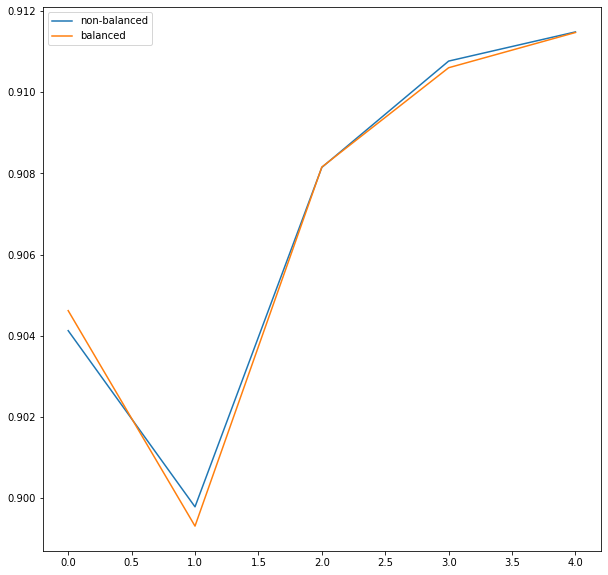

In [9]:
## YOUR CODE HERE

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
models = [('non-balanced', LogisticRegression()), 
          ('balanced', LogisticRegression(class_weight='balanced'))]
for name, m in models:
    scores = cv(X, y, m)
    plt.plot(scores,label=name )  
    print(name+': '+str(scores.mean()))
    
plt.legend(loc='upper left')#handler_map={line1: HandlerLine2D(numpoints=4)})

## END YOUR CODE

The AUC Score: 0.6373011707549989


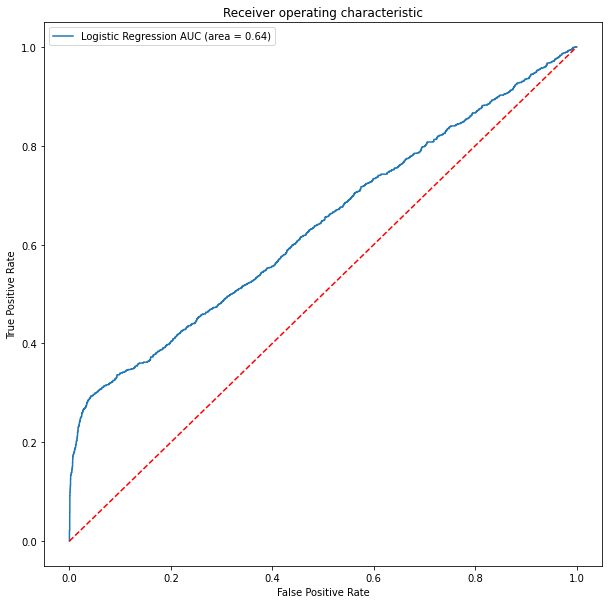

In [10]:
#Part2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

# Predicting the test set results and calculating the accuracy (Score)
y_pred = model.predict_proba(X_test)[:,1]
score = logreg.score(X_test, y_test)

# #Confusion Matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

# #Compute precision, recall, F-measure and support
# print(classification_report(y_test, y_pred))

#ROC Curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lr_roc_auc = metrics.auc(fpr, tpr)
print('The AUC Score: '+ str(lr_roc_auc))

fig = plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Logistic Regression AUC (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="upper left")
plt.show()

#### YOUR VERBAL SOLUTION HERE

We should *not* use class_weight = 'balanced', because we saw that balancing the data did not improve the results.
AUC for logistic regression classifier on test set (Using Cross Validation with k=5): 0.90

If we would plot this curve on each of the 5 folds (k=5), we don't get exactly the same plot, as the score is different each time because the data in the testset changes and divided differently in each iteration.

#### END YOUR VERBAL SOLUTION HERE

## 3.2 ANN
ANN (MLPClassifier in sklearn):

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters

The Log_loss: 6.092220457313449
The AUC Score: 0.7323931787492092


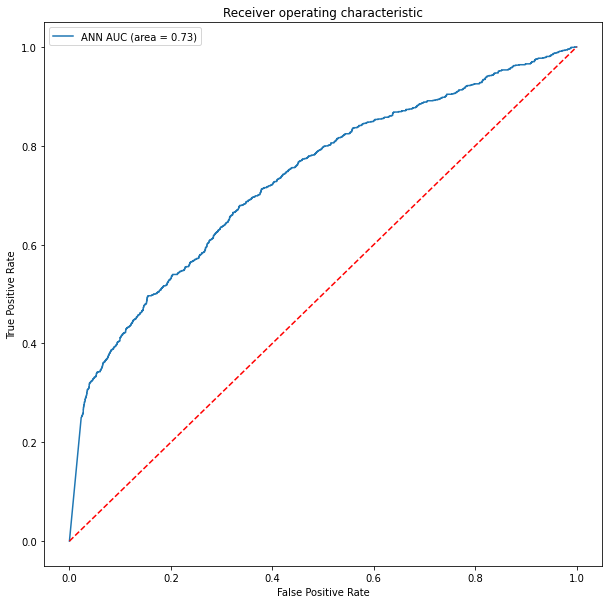

In [13]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
model = mlp.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = model.predict_proba(X_test)[:,1]
mlp_log_loss = metrics.log_loss(y_test, y_pred)
#print('log loss :'+ str(mlp_log_loss))
print('The Log_loss: ' + str(mlp_log_loss))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
mlp_roc_auc = metrics.auc(fpr, tpr)
print('The AUC Score: '+ str(mlp_roc_auc))

fig = plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ANN AUC (area = %0.2f)' % mlp_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="upper left")
plt.show()

plt.show()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE

We saw that the Multilayer Perceptron Classifier is better than the logistic regression one, because it gains 73% in AUC score while logistic regression achieves only 64% AUC score.
Binary classification, using a neural network is better in most cases than logistic regression (in fact, LR is a subset of it), but of course its also more complex than it.
 

#### END YOUR VERBAL SOLUTION HERE

## 3.3 Random forest
Random Forest classifier:

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters


The Log_loss: 0.36527541057755664
The AUC Score: 0.9054287366624407


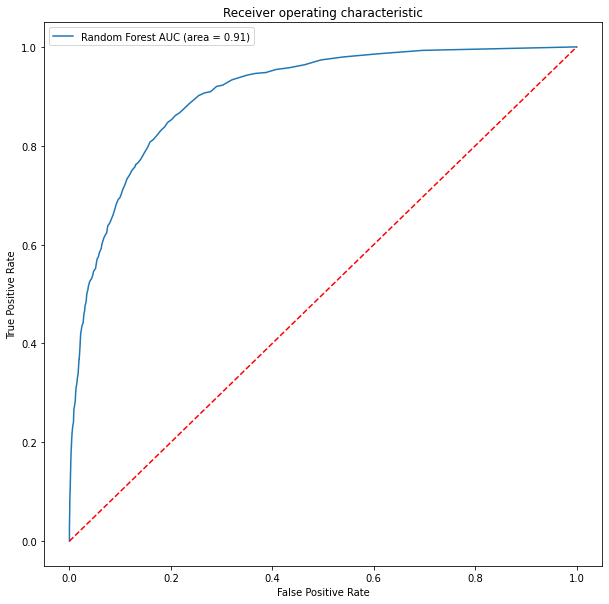

In [15]:
### YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = model.predict_proba(X_test)[:,1]
rf_log_loss = metrics.log_loss(y_test, y_pred)
print('The Log_loss: ' + str(rf_log_loss))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
rf_roc_auc = metrics.auc(fpr, tpr)
print('The AUC Score: '+ str(rf_roc_auc))

fig = plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Random Forest AUC (area = %0.2f)' % rf_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="upper left")
plt.show()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE

Random forest is better classifier than ANN (and than LR, of course..), as it gains significantly a higher AUC score (0.90) and reduced log loss.

#### END YOUR VERBAL SOLUTION HERE

## 3.4 Confusion matrix
Plot/print the confusion matrix of the random forest model on the test data

Explain shortly your results

[[3480  267]
 [ 432  706]]


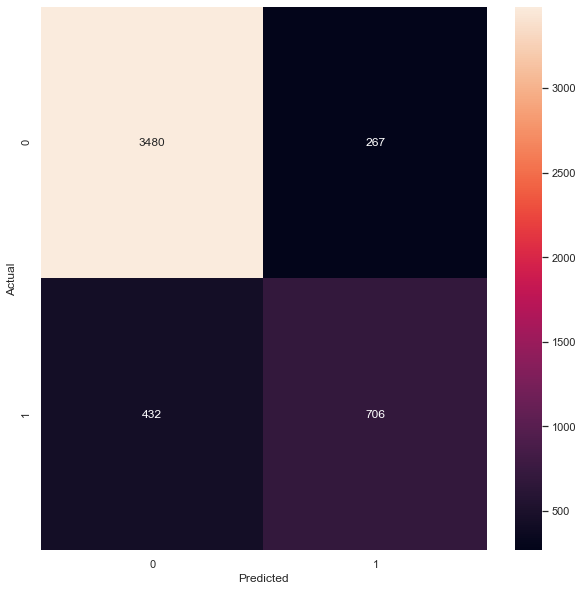

In [16]:
### YOUR CODE HERE
from sklearn.metrics import confusion_matrix

#Confusion Matrix
y_pred1 = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

# sns.set(rc={'figure.figsize': (10, 10)})
# sns.heatmap(confusion_matrix, annot=True, fmt="d")
# plt.show()

#The below code is only for displaying the axies.. :(
dff = pd.DataFrame({'y_pred': y_pred1, 'y_test': y_test})
c_matrix = pd.crosstab(dff['y_test'], dff['y_pred'], rownames=['Actual'], colnames=['Predicted'])

sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(c_matrix, annot=True, fmt="d")
plt.show()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE

In general, confusion matrix is very useful tool for measuring of any machine learning classifier. <br/>
(e.g. Recall, Precision, Specificity, Accuracy and most importantly, the AUC-ROC Curve) </br>
The confusion matrix of the Random forest model is plotted above. <br/>

We can see that: <br/>
3480 + 706 (85%) records were classified correctly (as 0 and 1 correspondingly) =  <br/>
267 + 432 (15%) records were missclassified </br>
 
267 'False Positive' (a.k.a Type 1 Error) - means that predicted positive and it’s false <br/>
432 'False Negative' (a.k.a Type 2 Error) - means that predicted negative and it’s false.

#### END YOUR VERBAL SOLUTION HERE

## 3.4 Global feature importance of the random forest and SHAP

* Plot the global feature importance of the features - use SHAP for this purpsose
* Choose two samples from the dataset and plot/print the local explanations for this samples. Explain which features
are important
* Explain in few words how this feature importance is calculated

**SHAP can be very slow on the random forest model. Thus, train another model with shallow trees (depth <7 for example) and you can also compute the SHAP values on a small data set. If it is yet very slow you, try to fit a different classifier for this purpose (MLP for example or GradientBoostingClassifier). You can also discard the binary features (which derived from the categorical features) for this purpose and stay only with the numerical ones.**


In [17]:
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
92,28,212563,10,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2574,34,203408,13,7688,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30858,33,65278,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6901,39,269722,13,0,0,70,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23898,57,195835,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
### YOUR CODE HERE
import shap #SHAP package
from sklearn.ensemble import RandomForestClassifier

#In case you are working in PyCharm (like me) you should 'tick' the Trusted checkbox in the notebook,
# or alternatively, use 'File -> Trust notebook', in order to allow JavaScript Code...

shap.initjs() 

numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#Using a rf model on a smaller dataset and shallow tree
X_train1 = X_train[numerical_features][:50]
y_train1 = y_train[:50]
X_test1 = X_test[numerical_features][:50]

# Tree on Random Forest explainer
rf = RandomForestClassifier(n_estimators=3,max_depth=2)
model = rf.fit(X_train1, y_train1)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(model.predict_proba, X_train1)
shap_values = explainer.shap_values(X_test1)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test1)

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
SHAP (SHapley Additive exPlanations) is a method taken from Game theory to explain a prediction of individual instance x by computing the contribution of each feature to its prediction.<br/>
The feature importance is calculated according to the average marginal contribution of a feature value over all possible coalitions (by measuring the score for each possible combination of features).<br/>
In our case we can see that "education_num" and "hours_per_week" features are very importnat to the prediction.

#### END YOUR VERBAL SOLUTION HERE

## 4 Clustering
Imagine that we don't really know the true labels -> we need to use unsupervised machine learning.

* Perform k means on X_train with k = 2. Is our clusters represent rich and poor people (does one cluster represent 'rich' ('>= 50k') people and the other 'poor' people)?

* Do the same with dbscan, understand how many clusters did you get and the proportion of 'rich' and 'poor' people in each cluster.

* Plot the clusters using pca (only for the kmeans). Are they seperated in the PCA dimension?
 
This question is more open minded and you can (recomended) use graphs that explain how well did the clustering work. Did it work well?? 

In [7]:
### YOUR CODE HERE

#Part1
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# Specify the number of clusters (2) and fit the data X_train
kmeans = KMeans(n_clusters=2).fit(X_train)

# Get the cluster centroids
kmeans_centroids = kmeans.cluster_centers_
print(kmeans_centroids)
    
# Get the cluster labels
kmeans_lables = kmeans.labels_
print(kmeans_lables)

Predict = KMeans(n_clusters=2).fit_predict(X_train)

[[ 3.70175636e+01  3.26868688e+05  9.90684277e+00  1.06530013e+03
   8.33373612e+01  4.03094000e+01  5.53604047e-02  2.97878320e-02
   6.57580441e-02  2.81017283e-04  7.11535759e-01  2.72586764e-02
   7.01138120e-02  3.97639455e-02  1.40508641e-04  3.06308838e-02
   4.10285233e-02  1.57369678e-02  8.85204440e-03  1.68610370e-02
   2.05142616e-02  1.71420542e-02  3.35815653e-02  3.83588591e-02
   1.59898834e-01  1.22242518e-02  3.11086132e-01  4.53842911e-02
   3.37220739e-03  1.65800197e-02  2.28748068e-01  1.28003372e-01
   4.21525924e-04  4.42602220e-01  1.22242518e-02  3.55908388e-01
   3.66727554e-02  2.41674863e-02  5.56414219e-02  1.16200646e-01
   2.81017283e-04  1.27300829e-01  1.12687930e-01  3.02093579e-02
   4.94590417e-02  6.05592244e-02  1.03414360e-01  5.62034565e-03
   1.22383027e-01  2.19193480e-02  1.12406913e-01  2.86637628e-02
   5.32527750e-02  3.93002670e-01  2.65280315e-01  3.66727554e-02
   1.57510187e-01  1.05803007e-01  4.17310665e-02  4.35576788e-03
   2.34649

In [8]:
import numpy as np
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Compute similarities
D = distance.squareform(distance.pdist(X_train))
S = 1 - (D / np.max(D))

In [ ]:
db = DBSCAN()
db.fit(S)
core_samples = db.core_sample_indices_
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

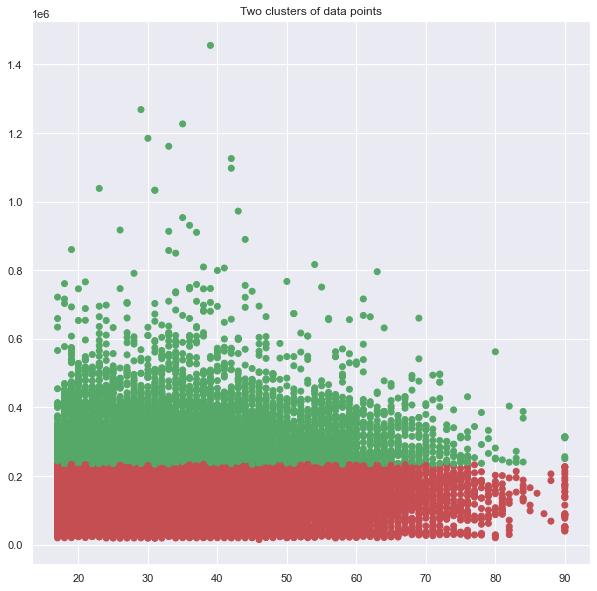

In [22]:
#Part2
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)

# Generate scatter plot for training data
colors = {0:'r', 1: 'g'}
label_color = [colors[l] for l in Predict]

plt.figure(figsize=(10,10))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c= label_color, marker="o", picker=True)
plt.title('Two clusters of data points')
plt.show()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
It seems our dataset is indeed divided into two clustered (<=50K "Poor") and (>50K "Rich"). <br/>
I've printed the K-Means centroids and the labels (0,1), and plotted them using the PCA with 3 component.<br/>
The DBScan algo took me couple of hours to run (maybe a wrong implementation?!), till I interuppted him since the IDE got stack several times :(
#### END YOUR VERBAL SOLUTION HERE